In [1]:
pip install pandas
pip install numpy
pip install scipy
pip install seaborn

SyntaxError: invalid syntax (<ipython-input-1-515e1b9556ea>, line 1)

In [4]:
import pandas as pd
cols = ["Name", "Lenght", "EffectiveLenght", "TPM", "NumReads"]

c = pd.read_csv('/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/ERI1_casos.txt', sep = '\t', header = None, names = cols)
#print(c)
print(c.iloc[:, [0,3]]) #Con la función iloc() de panda se selecciona las columnas por el índice

                                                 Name       TPM
0   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
1   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
2   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
3   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.663069
4   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.133789
5   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
6   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
7   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
8   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
9   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
10  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.276302
11  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.211788
12  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
13  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.136375
14  ENSG00000104626|ENST00000523898|ERI1

In [5]:
ct = pd.read_csv('/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/ERI1_controles.txt', sep = '\t', header = None, names = cols)
#print(ct[['Name', 'TPM']]) Seleccionamos las columnas con el doble corchete, el primero extrae una llista y el segundo la pasa

print(ct.loc[:, ["Name", "TPM"]]) #Con la función loc() se seleccionan las columnas por sus nombres, el doble corchete es como el c() en R

                                                 Name       TPM
0   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
1   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
2   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
3   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
4   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
5   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
6   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
7   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
8   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
9   ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.106396
10  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
11  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
12  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.000000
13  ENSG00000104626|ENST00000523898|ERI1|protein_c...  0.192088
14  ENSG00000104626|ENST00000523898|ERI1

['ERI1', 'HNRNPK', 'SRSF3', 'TIA1', 'PCBP2', 'SUPV3L1', 'NXF1', 'YBX1']
ERI1 y su p-valor es:  [0.21204486]
HNRNPK y su p-valor es:  [4.75052184e-06]
SRSF3 y su p-valor es:  [4.85615899e-06]
TIA1 y su p-valor es:  [5.88967053e-05]
PCBP2 y su p-valor es:  [7.43506662e-09]
SUPV3L1 y su p-valor es:  [0.09898122]
NXF1 y su p-valor es:  [0.00592309]
YBX1 y su p-valor es:  [1.32230362e-07]


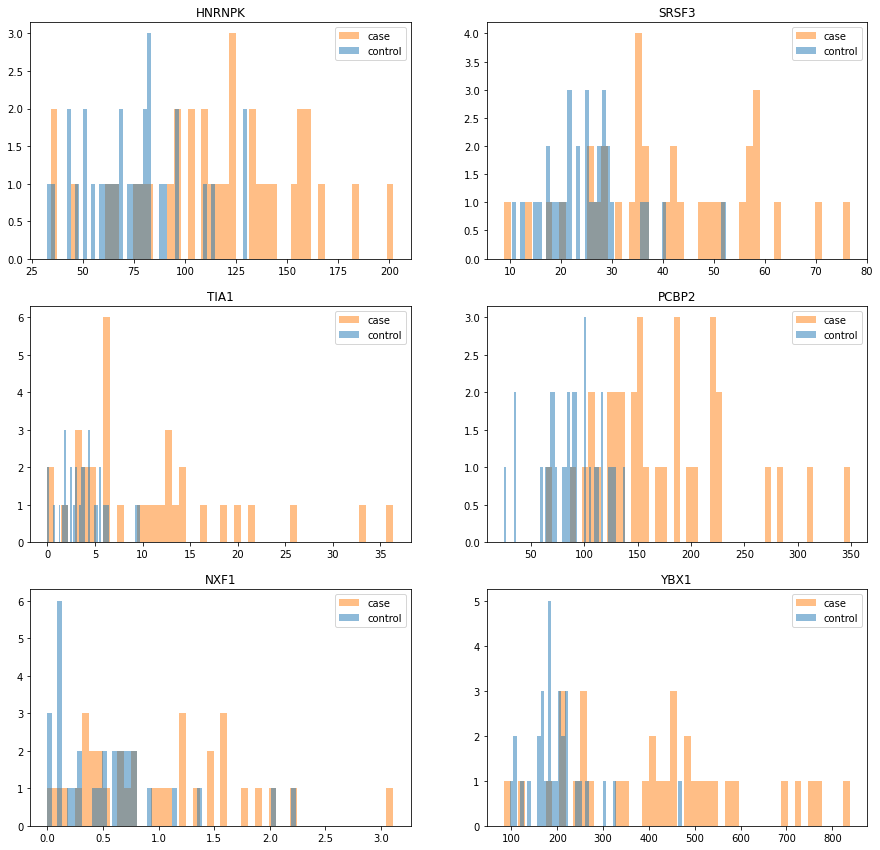

In [12]:
#NSD1 004 RNA BINDING PROTEINS
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/NSD1004/'
directorio = os.listdir(isoforms)
colsc = ["Name", "Lenght", "EffectiveLenght", "Casos", "NumReads"]
colsct = ["Name", "Lenght", "EffectiveLenght", "Controles", "NumReads"]

print('NSD1 004 RNA BINGING PROTEINS')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
#i = {}
plt.subplots(figsize = (15, 20))

for gen in genes:
    casos = pd.read_csv(os.path.join(isoforms, gen + "_casos.txt"), sep = '\t', header = None, names = colsc)
    controles = pd.read_csv(os.path.join(isoforms, gen + "_controles.txt"), sep = '\t', header = None, names = colsct)
    pval = stats.ttest_ind(casos[['Casos']], controles[['Controles']], equal_var = False)
    #i[gen]= pval.pvalue
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    if pval.pvalue < 0.05:
        case = casos['Casos'].tolist()
        control = controles['Controles'].tolist()
        plt.subplot(4, 2, count)
        plt.hist(case, color = case_col, bins = 50, label = 'case', alpha = 0.5)
        plt.hist(control, color = control_col, bins = 50, label = 'control', alpha = 0.5)
        plt.title(gen)
        plt.legend(loc = 'upper right')
        count += 1
        
plt.show()

['NSD1-004', 'CUX1-020', 'NSD1-001', 'CUX1-004']
NSD1-004 and his p-valor is:  [0.49607136]
CUX1-020 and his p-valor is:  [0.07049659]
NSD1-001 and his p-valor is:  [0.63750182]
CUX1-004 and his p-valor is:  [0.43655385]


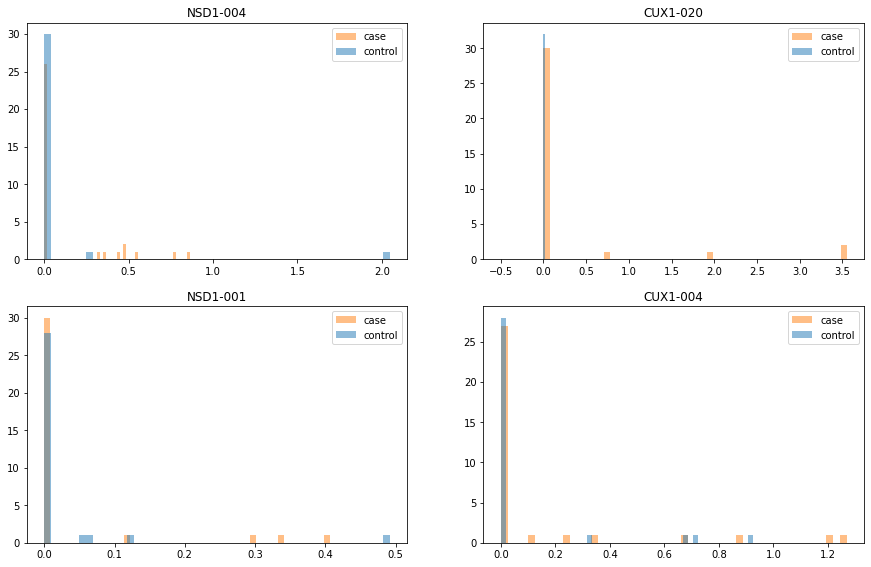

In [4]:
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/'
directorio = os.listdir(isoforms)
colsc = ["Name", "Lenght", "EffectiveLenght", "Casos", "NumReads"]
colsct = ["Name", "Lenght", "EffectiveLenght", "Controles", "NumReads"]

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
#i = {}
plt.subplots(figsize = (15, 20))

for gen in genes:
    casos = pd.read_csv(os.path.join(isoforms, gen + "_casos.txt"), sep = '\t', header = None, names = colsc)
    controles = pd.read_csv(os.path.join(isoforms, gen + "_controles.txt"), sep = '\t', header = None, names = colsct)
    pval = stats.ttest_ind(casos[['Casos']], controles[['Controles']], equal_var = False)
    #i[gen]= pval.pvalue
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    #if pval.pvalue < 0.05:
    case = casos['Casos'].tolist()
    control = controles['Controles'].tolist()
    plt.subplot(4, 2, count)
    plt.hist(case, color = case_col, bins = 50, label = 'case', alpha = 0.5)
    plt.hist(control, color = control_col, bins = 50, label = 'control', alpha = 0.5)
    plt.title(gen)
    plt.legend(loc = 'upper right')
    count += 1
        
plt.show()

CUX1 004 RNA BINDING PROTEINS
['OAS1', 'AGO1', 'ERI1', 'ZFP36', 'TARDBP', 'CELF1']
OAS1 and its p-value is:  [0.14589252]
AGO1 and its p-value is:  [2.46904925e-08]
ERI1 and its p-value is:  [0.21204486]
ZFP36 and its p-value is:  [0.23869908]
TARDBP and its p-value is:  [1.92482614e-11]
CELF1 and its p-value is:  [0.12315071]


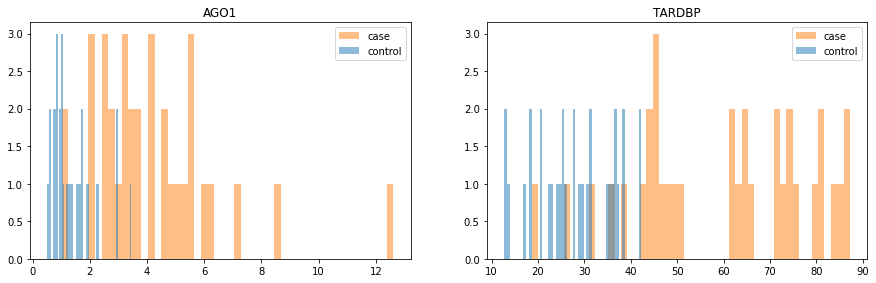

In [3]:
#CUX1 004 RNA BINDING PROTEINS
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/CUX1004/'
directorio = os.listdir(isoforms)
colsc = ["Name", "Lenght", "EffectiveLenght", "Casos", "NumReads"]
colsct = ["Name", "Lenght", "EffectiveLenght", "Controles", "NumReads"]

print('CUX1 004 RNA BINDING PROTEINS')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
#i = {}
plt.subplots(figsize = (15, 20))

for gen in genes:
    casos = pd.read_csv(os.path.join(isoforms, gen + "_casos.txt"), sep = '\t', header = None, names = colsc)
    controles = pd.read_csv(os.path.join(isoforms, gen + "_controles.txt"), sep = '\t', header = None, names = colsct)
    pval = stats.ttest_ind(casos[['Casos']], controles[['Controles']], equal_var = False)
    #i[gen]= pval.pvalue
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    if pval.pvalue < 0.05:
        case = casos['Casos'].tolist()
        control = controles['Controles'].tolist()
        plt.subplot(4, 2, count)
        plt.hist(case, color = case_col, bins = 50, label = 'case', alpha = 0.5)
        plt.hist(control, color = control_col, bins = 50, label = 'control', alpha = 0.5)
        plt.title(gen)
        plt.legend(loc = 'upper right')
        count += 1
        
plt.show()

CUX1 020 RNA BINDING PROTEINS
['PHAX', 'CMTR1', 'RBM6', 'SRSF10', 'SRSF3', 'TRA2B', 'SAMD4A']
PHAX and its p-value is:  [4.47827512e-08]
CMTR1 and its p-value is:  [2.16677661e-08]
RBM6 and its p-value is:  [0.00789813]
SRSF10 and its p-value is:  [0.15980884]
SRSF3 and its p-value is:  [6.60304427e-11]
TRA2B and its p-value is:  [0.00063579]
SAMD4A and its p-value is:  [0.03454374]


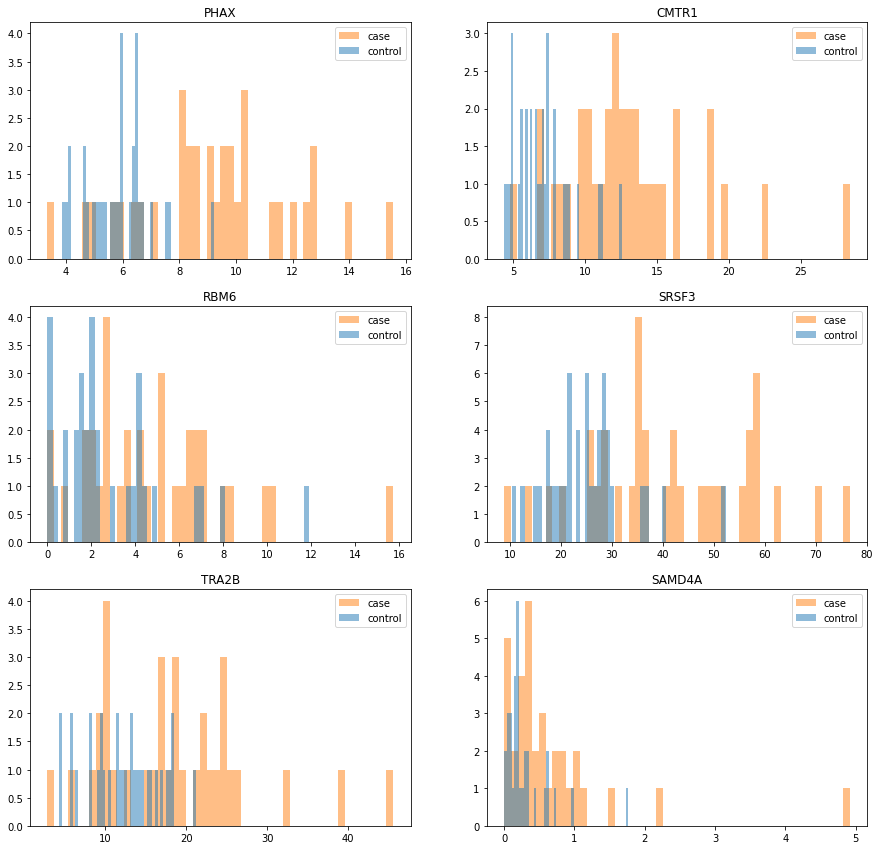

In [2]:
#CUX1 020 RNA BINGING PROTEINS
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/CUX1020/'
directorio = os.listdir(isoforms)
colsc = ["Name", "Lenght", "EffectiveLenght", "Casos", "NumReads"]
colsct = ["Name", "Lenght", "EffectiveLenght", "Controles", "NumReads"]

print('CUX1 020 RNA BINDING PROTEINS')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
plt.subplots(figsize = (15, 20))

for gen in genes:
    casos = pd.read_csv(os.path.join(isoforms, gen + "_casos.txt"), sep = '\t', header = None, names = colsc)
    controles = pd.read_csv(os.path.join(isoforms, gen + "_controles.txt"), sep = '\t', header = None, names = colsct)
    pval = stats.ttest_ind(casos[['Casos']], controles[['Controles']], equal_var = False)
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    if pval.pvalue < 0.05:
        case = casos['Casos'].tolist()
        control = controles['Controles'].tolist()
        plt.subplot(4, 2, count)
        plt.hist(case, color = case_col, bins = 50, label = 'case', alpha = 0.5)
        plt.hist(control, color = control_col, bins = 50, label = 'control', alpha = 0.5)
        plt.title(gen)
        plt.legend(loc = 'upper right')
        count += 1
        
plt.show()

['RBM4-2', 'PPRC1', 'RBM4-3', 'RBM4-1', 'RBM14']
RBM4-2 and its p-value is:  [7.69127185e-06]
PPRC1 and its p-value is:  [0.09318785]
RBM4-3 and its p-value is:  [0.04047486]
RBM4-1 and its p-value is:  [2.46176902e-06]
RBM14 and its p-value is:  [1.93057379e-06]


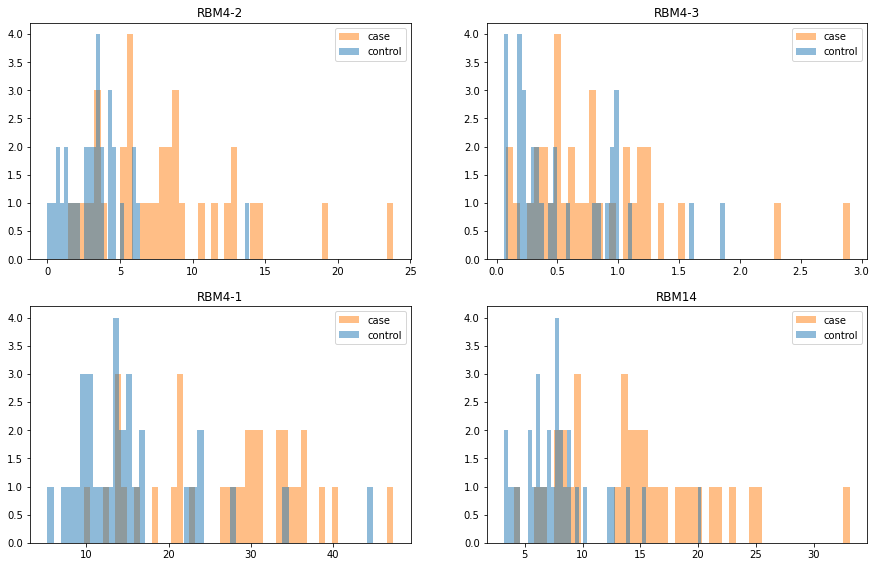

In [19]:
#NSD1 001 RNA BINDING PROTEINS
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/NSD1001/'
directorio = os.listdir(isoforms)
colsc = ["Name", "Lenght", "EffectiveLenght", "Casos", "NumReads"]
colsct = ["Name", "Lenght", "EffectiveLenght", "Controles", "NumReads"]

print('NSD1 001 RNA BINDING PROTEINS')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
plt.subplots(figsize = (15, 20))

for gen in genes:
    casos = pd.read_csv(os.path.join(isoforms, gen + "_casos.txt"), sep = '\t', header = None, names = colsc)
    controles = pd.read_csv(os.path.join(isoforms, gen + "_controles.txt"), sep = '\t', header = None, names = colsct)
    pval = stats.ttest_ind(casos[['Casos']], controles[['Controles']], equal_var = False)
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    if pval.pvalue < 0.05:
        case = casos['Casos'].tolist()
        control = controles['Controles'].tolist()
        plt.subplot(4, 2, count)
        plt.hist(case, color = case_col, bins = 50, label = 'case', alpha = 0.5)
        plt.hist(control, color = control_col, bins = 50, label = 'control', alpha = 0.5)
        plt.title(gen)
        plt.legend(loc = 'upper right')
        count += 1
        
plt.show()

['CUX1', 'NSD1']
CUX1 and its p-value is:  [0.37254453]
NSD1 and its p-value is:  [0.05242168]


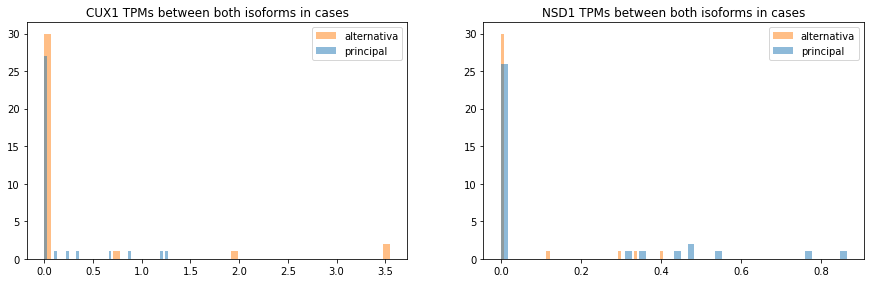

In [18]:
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/CUX1_NSD1/CASOS/'
directorio = os.listdir(isoforms)
colscp = ["Name", "Lenght", "EffectiveLenght", "Casos_Principal", "NumReads"]
colsca = ["Name", "Lenght", "EffectiveLenght", "Casos_Alternativa", "NumReads"]

print('Differences between the main isoform and the alternative of the TPMs values in cases')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
#i = {}
plt.subplots(figsize = (15, 20))

for gen in genes:
    alternativa = pd.read_csv(os.path.join(isoforms, gen + "_casos-alternativa.txt"), sep = '\t', header = None, names = colsca)
    principal = pd.read_csv(os.path.join(isoforms, gen + "_casos-principal.txt"), sep = '\t', header = None, names = colscp)
    pval = stats.ttest_ind(alternativa[['Casos_Alternativa']], principal[['Casos_Principal']], equal_var = False)
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    #if pval.pvalue < 0.05:
    altn = alternativa['Casos_Alternativa'].tolist()
    pcpl = principal['Casos_Principal'].tolist()
    plt.subplot(4, 2, count)
    plt.hist(altn, color = case_col, bins = 50, label = 'alternativa', alpha = 0.5)
    plt.hist(pcpl, color = control_col, bins = 50, label = 'principal', alpha = 0.5)
    plt.title(gen + ' TPMs between both isoforms in cases')
    plt.legend(loc = 'upper right')
    count += 1
        
plt.show()

['CUX1', 'NSD1']
CUX1 and its p-value is:  [0.05567987]
NSD1 and its p-value is:  [0.46321411]


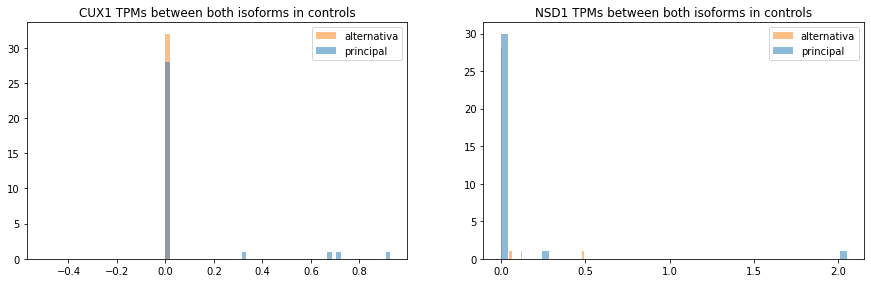

In [16]:
import pandas as pd
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style as st
import os 
import os.path
isoforms = '/home/user05/Desktop/MN4/Resultados/Resultados/Isoforms/CUX1_NSD1/CONTROLES/'
directorio = os.listdir(isoforms)
colscp = ["Name", "Lenght", "EffectiveLenght", "Controles_Principal", "NumReads"]
colsca = ["Name", "Lenght", "EffectiveLenght", "Controles_Alternativa", "NumReads"]

print('Differences between the main isoform and the alternative of the TPMs values in controls')

genes = set()
for archivo in directorio:
    if archivo.endswith('.txt'):
        g = archivo.split(sep = '_')[0]
        genes.add(g)

genes = list(genes)
print(genes)

case_col = "#ff7f0e"
control_col = "#1f77b4"

count = 1
#i = {}
plt.subplots(figsize = (15, 20))

for gen in genes:
    alternativa = pd.read_csv(os.path.join(isoforms, gen + "_controles-alternativa.txt"), sep = '\t', header = None, names = colsca)
    principal = pd.read_csv(os.path.join(isoforms, gen + "_controles-principal.txt"), sep = '\t', header = None, names = colscp)
    pval = stats.ttest_ind(alternativa[['Controles_Alternativa']], principal[['Controles_Principal']], equal_var = False)
    print(gen, 'and its p-value is: ', pval.pvalue)
    
    #if pval.pvalue < 0.05:
    altn = alternativa['Controles_Alternativa'].tolist()
    pcpl = principal['Controles_Principal'].tolist()
    plt.subplot(4, 2, count)
    plt.hist(altn, color = case_col, bins = 50, label = 'alternativa', alpha = 0.5)
    plt.hist(pcpl, color = control_col, bins = 50, label = 'principal', alpha = 0.5)
    plt.title(gen + ' TPMs between both isoforms in controls')
    plt.legend(loc = 'upper right')
    count += 1
        
plt.show()